#### Знакомство с библиотекой Scikit-Learn

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
#n_samples = iris.shape[0]

In [3]:
#n_features = iris.shape[1]

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


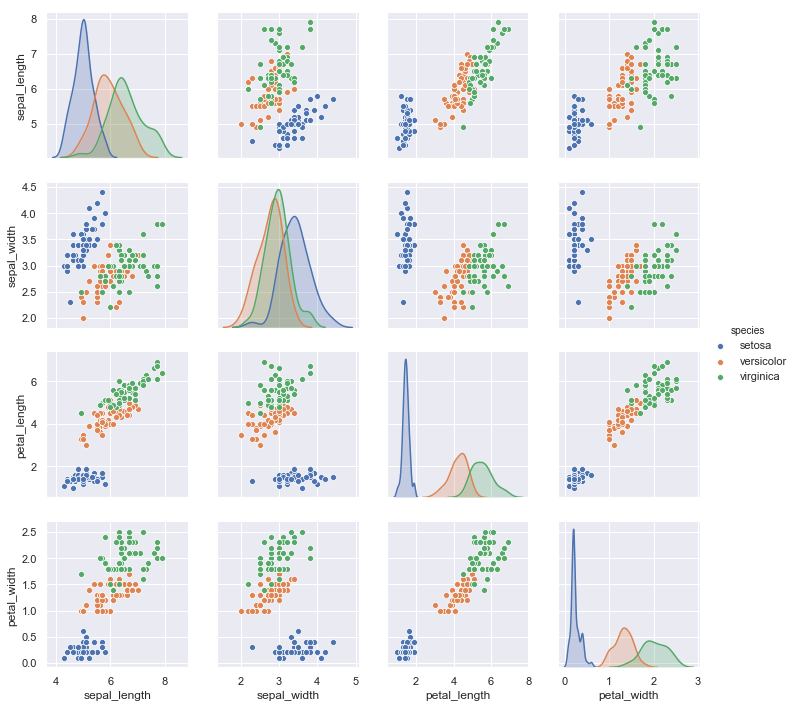

In [4]:
%matplotlib inline
sns.set()
sns.pairplot(iris, hue='species', size=2.5);

In [5]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [6]:
y_iris = iris['species']
y_iris.shape

(150,)

#### Пример обучения с учителем: простая линейная регрессия

In [7]:
import matplotlib.pyplot as plt
import numpy as np

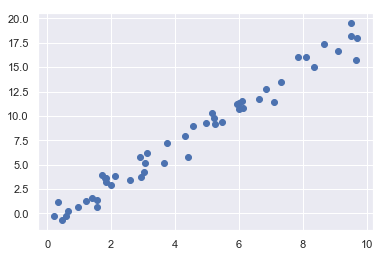

In [8]:
rng = np.random.RandomState(42)
x= 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x,y);

In [9]:
# Шаг 1. Выбор класса модели
from sklearn.linear_model import LinearRegression

In [10]:
# Шаг 2. Выбор гиперпараметров модели
model = LinearRegression(fit_intercept=True) # подбор точки пересечения с осью координат делаем
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
# Шаг 3. Формирование из данных матриц признаков и целевого вектора
x.shape

(50,)

In [12]:
X = x[:,np.newaxis]
X.shape

(50, 1)

In [13]:
# Шаг 4. Обучение модели на наших данных
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
model.coef_ # угловой коэф.

array([1.9776566])

In [15]:
model.intercept_ # точка пересечения с осью координат (верт)

-0.9033107255311164

In [16]:
# Шаг 5. Предсказание меток для новых данных
xfit = np.linspace(-1,11)
xfit.shape

(50,)

In [17]:
Xfit = xfit[:,np.newaxis]
yfit = model.predict(Xfit)

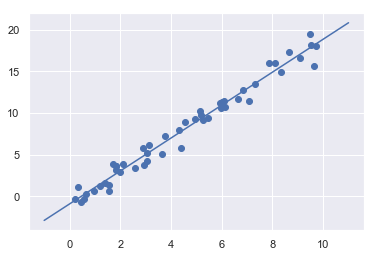

In [18]:
plt.scatter(x,y)
plt.plot(Xfit, yfit);

#### Пример обучения с учителем: классификация набора данных Iris

In [19]:
from sklearn.model_selection  import train_test_split

In [20]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [21]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

#### Пример обучения без учителя: понижение размерности набора данных Iris

In [23]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

In [24]:
X_2D.shape

(150, 2)

In [25]:
X_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
X_2D.shape

(150, 2)

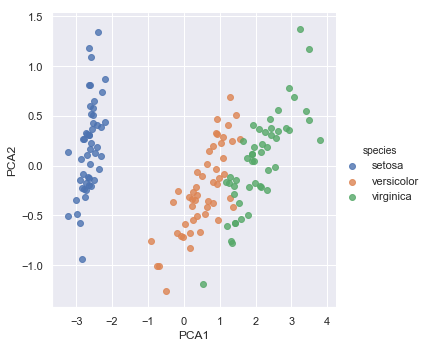

In [27]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

#### Пример обучения без учителя: кластеризация набора данных Iris (метод GaussianMixture Смесь Гауссовых распределений)

In [28]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

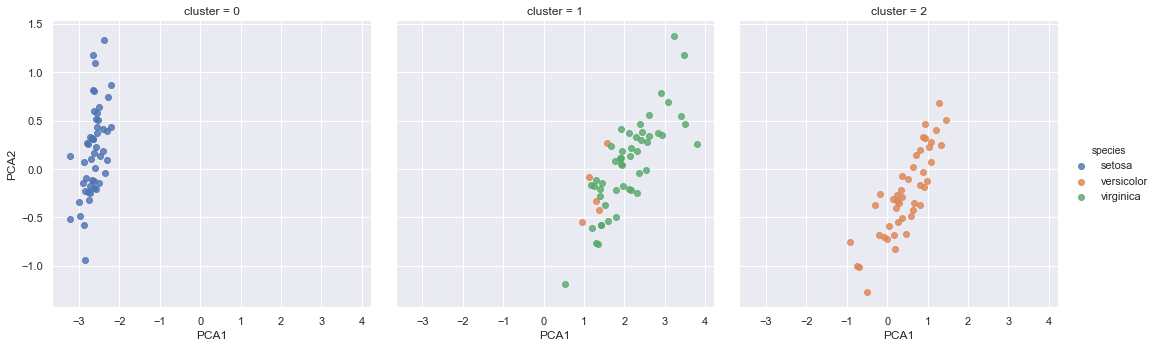

In [29]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False);

#### Прикладна задача: анализ рукописных цифр

In [30]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

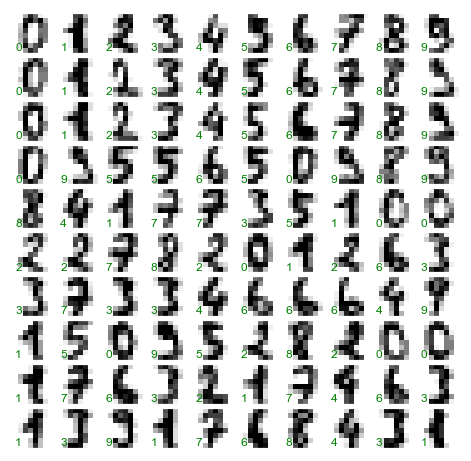

In [31]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10,10, figsize=(8,8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary',
             interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
           transform=ax.transAxes, color='green')

In [32]:
X = digits.data
X.shape

(1797, 64)

In [33]:
y = digits.target
y.shape

(1797,)

##### Обучение без учителя: понижение размерности (Isomap)

In [34]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

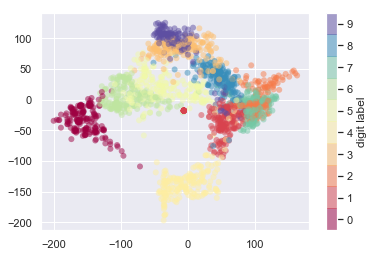

In [35]:
plt.scatter(data_projected[:,0], data_projected[:,1],
           c = digits.target, edgecolor='none', alpha=0.5,
           cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

##### Классификация цифр

In [36]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [37]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

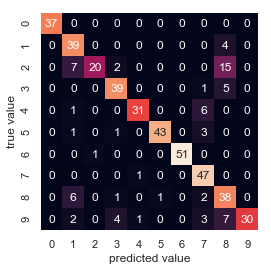

In [39]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

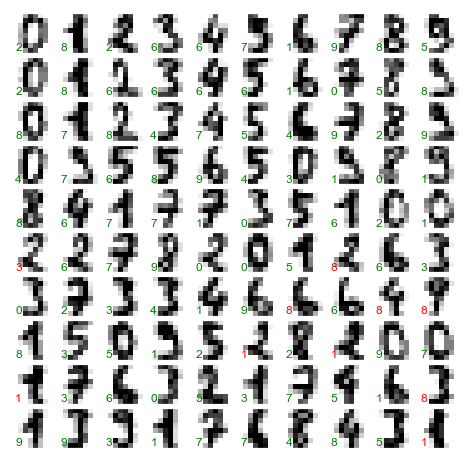

In [40]:
fig, axes = plt.subplots(10, 10, figsize=(8,8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary',
             interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
           transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

### Гиперпараметры и проверка модели

##### Плохой способ проверки модели

In [41]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [42]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [43]:
model.fit(X,y)
y_model = model.predict(X)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

##### Хороший способ проверки модели: отложенные модели (holdout sets)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                 train_size=0.5)
model.fit(X1, y1)

y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.9066666666666666

##### Перекрестная проверка

In [47]:
# two-fold-cross-validation
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)

accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

In [48]:
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [49]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [50]:
# перекрестная проверка по всем без одного
# leave-one-out cross-validation
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
# единицы - правильные ответы, нули - неправильные
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [51]:
scores.mean()

0.96

In [52]:
scores.sum()

144.0

### Выбор оптимальной модели

##### Кривые проверки в Scikit-Learn

In [53]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [54]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

In [55]:
# создадим данные
import numpy as np
def make_data(N, err=1.0 , rseed=1):
    # создаем случайные выборки данных
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1.0 / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

In [56]:
X, y = make_data(40)

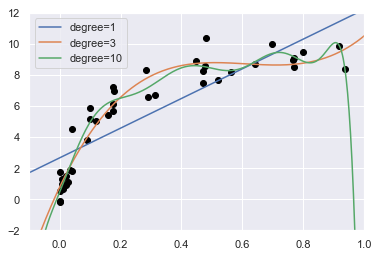

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

X_test = np.linspace(-0.1, 1.1, 500)[:,None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()

for degree in [1, 3, 10]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

In [58]:
# Строим кривую проверки
from sklearn.model_selection import validation_curve
degree = np.arange(1, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 'polynomialfeatures__degree', degree, cv=7)

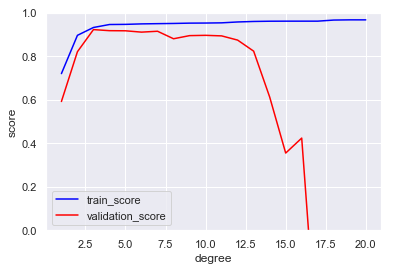

In [59]:
plt.plot(degree, np.median(train_score, axis=1), color='blue',
        label='train_score') # оценка обучения
plt.plot(degree, np.median(val_score, axis=1), color='red',
        label='validation_score') # оценка обучения
plt.legend(loc='best')
plt.ylim(0,1)
plt.xlabel('degree') # степень
plt.ylabel('score'); # оценка
# лучший результат для много члена 3 степени

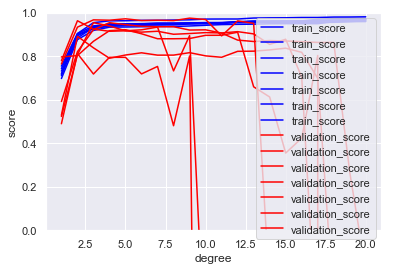

In [60]:
plt.plot(degree, train_score, color='blue',
        label='train_score') # оценка обучения
plt.plot(degree, val_score, color='red',
        label='validation_score') # оценка обучения
plt.legend(loc='best')
plt.ylim(0,1)
plt.xlabel('degree') # степень
plt.ylabel('score'); # оценка

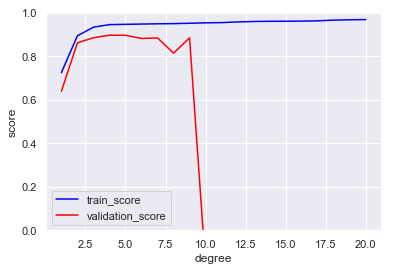

In [61]:
plt.plot(degree, np.mean(train_score, axis=1), color='blue',
        label='train_score') # оценка обучения
plt.plot(degree, np.mean(val_score, axis=1), color='red',
        label='validation_score') # оценка обучения
plt.legend(loc='best')
plt.ylim(0,1)
plt.xlabel('degree') # степень
plt.ylabel('score'); # оценка

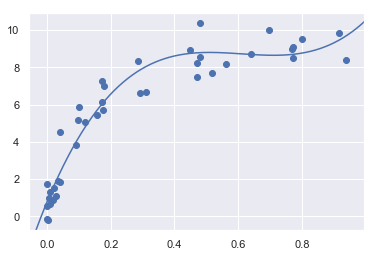

In [62]:
# для многочлена 3 степени
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

#### Кривые обучения

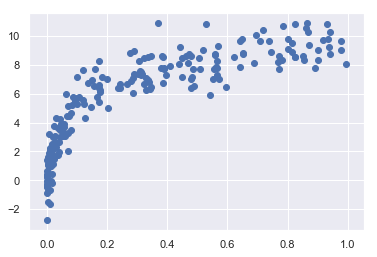

In [63]:
# сгенерируем в 5 раз больше точек
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

In [67]:
degree = np.arange(1,21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2, 'polynomialfeatures__degree', degree, cv=7)

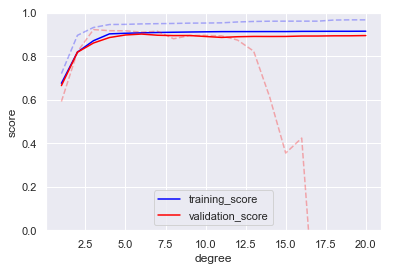

In [68]:
plt.plot(degree, np.median(train_score2, axis=1), color='blue',
        label='training_score')
plt.plot(degree, np.median(val_score2, axis=1), color='red',
        label='validation_score') 
plt.plot(degree, np.median(train_score, axis=1), color='blue', alpha = 0.3,
        linestyle='dashed') 
plt.plot(degree, np.median(val_score, axis=1), color='red', alpha = 0.3,
        linestyle='dashed') 
plt.legend(loc='lower center')
plt.ylim(0,1)
plt.xlabel('degree') 
plt.ylabel('score'); 

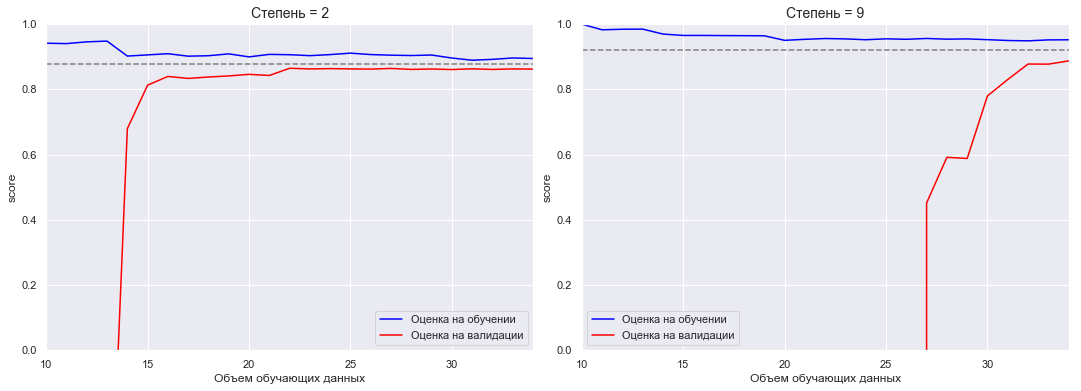

In [74]:
# кривые обучения в sklearn
from sklearn.model_selection import learning_curve
fig, ax = plt.subplots(1, 2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2,9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                        X,y, cv=7, 
                                        train_sizes=np.linspace(0.3,1,25))
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='Оценка на обучении')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='Оценка на валидации')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                color='gray',
                linestyle='dashed')
    ax[i].set_ylim(0,1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('Объем обучающих данных') # размер выборки
    ax[i].set_ylabel('score')
    ax[i].set_title('Степень = {0}'.format(degree), size=14)
    ax[i].legend(loc='best');

#### Проверка на практике: поиск по сетке

In [76]:
from sklearn.model_selection import GridSearchCV

In [80]:
param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]
    
}

In [81]:
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [82]:
grid.fit(X,y)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=7, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [83]:
# узнаем значения оптимальных параметров
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

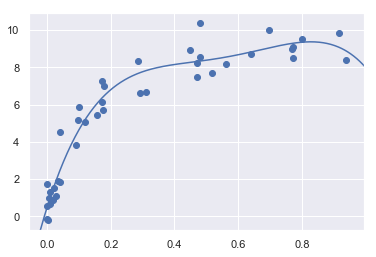

In [89]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X,y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

### Проектирование признаков - Feature engineering

##### Категориальные признаки

In [90]:
data = [
    {'price':850000, 'rooms':4, 'neighborhood':'Queen Anne'},
    {'price':700000, 'rooms':3, 'neighborhood':'Fremont'},
    {'price':650000, 'rooms':3, 'neighborhood':'Wallingford'},
    {'price':600000, 'rooms':2, 'neighborhood':'Fremont'}
    
    
]

##### Прямое кодирование - One-hot encoding

In [91]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]], dtype=int32)

In [92]:
# просмотреть названия признаков
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [93]:
# т.к. размер датасета может сильно вырасти, используем разреженный формат вывода:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

In [94]:
# приведенное выше представление принимают не все оцениватели. 
# может понадобиться:
# sklearn.preprocessing.OneHotEncoder
# sklearn.feature_extraction.FeatureHasher

#### Текстовые признаки

In [95]:
sample = ['problem of evil', 'evil queen', 'horizon problem']

In [96]:
# используем CountVectorizer для перевода встречаемости слова в фразе в число
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [97]:
# переведем спарс-матрицу в датафрейм
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


Более корректно будет использовать TF-IDF признаки

Терма-обратная частотность документа
Term frequency-inverse document frecuency

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000
